In [1]:
%load_ext autoreload
%aimport script

import pandas as pd
import numpy as np
from time import time
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Helvetica Neue', 'Helvetica Neue LT']+plt.rcParams['font.sans-serif']
colors = plt.get_cmap("Dark2").colors

In [2]:
data = pd.read_csv('data/adult.data', delimiter=',', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df_times = pd.DataFrame(columns=['shape', 'id', 'K', 'time'])
df_times.set_index(['K', 'shape', 'id'], inplace=True)

shapes = np.array([125, 250, 500, 1000, 2000, 4000, 8000, 16000, 32000])
Ks = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15])

for K in Ks:
    for shape in shapes:
        for ii in range(20):
            dt = time()
            script.k_means(data.head(shape),
                           numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                           K=2, iters=2, method='gower', mode_nominal=False)
            dt = time()-dt

            df_times.loc[(K, shape,ii), 'time'] = dt
    
df_times

time
K  shape id          
2  125   0   0.012966
         1   0.009977
         2   0.009978
         3   0.009977
         4   0.009977
...               ...
15 32000 15  0.189996
         16  0.190995
         17     0.189
         18  0.189996
         19  0.189997

[2520 rows x 1 columns]

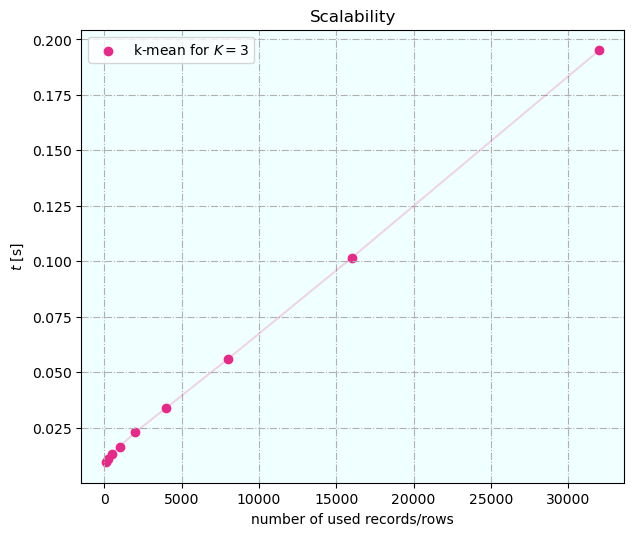

In [4]:
df_mean = df_times.groupby(level=[0,1]).agg({'time': lambda x: np.mean(x)})
df_var = df_times.groupby(level=[0,1]).agg({'time': lambda x: np.sqrt(np.var(x))})

fig, ax = plt.subplots(figsize=(7,6), dpi=100)

K=3
ax.scatter(df_mean.loc[K].index.to_numpy(), df_mean.loc[K].to_numpy(), color=colors[K], label=r'k-mean for $K=$'+f'{K}')
ax.plot(df_mean.loc[K].index.to_numpy(), df_mean.loc[K].to_numpy(), color=colors[K], ls='-', alpha=0.2)

ax.set_facecolor('azure')
ax.set_title('Scalability')
ax.set_xlabel('number of used records/rows')
ax.set_ylabel(r'$t$ [s]')
ax.grid(ls='-.')
ax.legend()

plt.savefig("plots/scalability_rows.pdf", transparent=True, bbox_inches='tight')
plt.show()

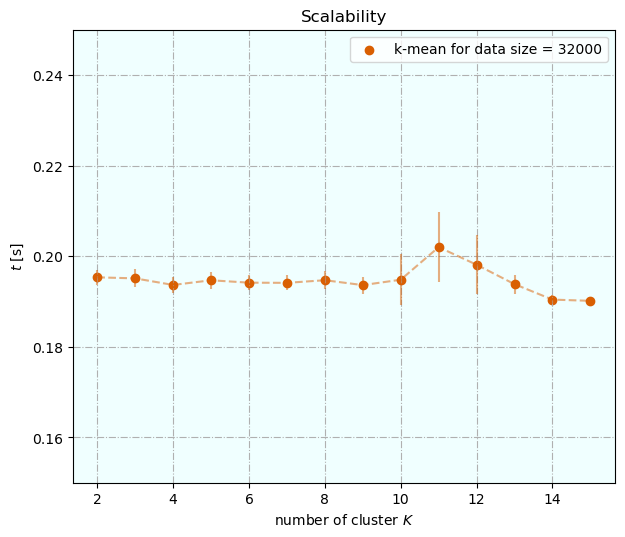

In [5]:
df_mean = df_times.groupby(level=[1,0]).agg({'time': lambda x: np.mean(x)})
df_var = df_times.groupby(level=[1,0]).agg({'time': lambda x: np.sqrt(np.var(x))})

fig, ax = plt.subplots(figsize=(7,6), dpi=100)

shape=32000
ax.scatter(df_mean.loc[shape].index.to_numpy(), df_mean.loc[shape].to_numpy(), color=colors[1], label=r'k-mean for data size = '+f'{shape}')
ax.errorbar(df_mean.loc[shape].index.to_numpy(), df_mean.loc[shape].to_numpy(),
            yerr=df_var.loc[shape].to_numpy()[:,0], color=colors[1], ls='--', alpha=0.5)


ax.set_facecolor('azure')
ax.set_title('Scalability')
ax.set_xlabel(r'number of cluster $K$')
ax.set_ylabel(r'$t$ [s]')
ax.grid(ls='-.')
ax.set_ylim(0.15, 0.25)

ax.legend()

plt.savefig("plots/scalability_K.pdf", transparent=True, bbox_inches='tight')
plt.show()